In [0]:
import numpy as np

class SingleLayer:
  def __init__(self,learning_rate=0.1,l1=0,l2=0): # Constructor, 생성자, ctr
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history=[]
    self.lr=learning_rate
    self.l1=l1
    self.l2=l2

  def forpass(self,x):
    return np.sum(x*self.w)+self.b

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad

  def activation(self,z):
    return 1/(1+np.exp(-z))

  def reg_loss(self):
    return self.l1*np.sum(np.abs(self.w))+self.l2*np.sum(self.w**2)/2.0

  def update_val_loss(self,x_val,y_val):
    if x_val is None: return
    val_loss=0
    for i in range(len(x_val)):
      z=self.forpass(x_val[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

  def fit(self,x,y,epochs=100, x_val=None, y_val=None):
    self.w=np.ones(x.shape[1]) # [1,1,1,1,1,1]
    self.b=0 # [0]
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=-(y[i]-a)
        w_grad,b_grad=self.backprop(x[i],err)
        w_grad+=self.l1*np.sign(self.w) + self.l2*self.w
        self.w=self.w-w_grad*self.lr
        self.b=self.b-b_grad
        self.w_history.append(self.w.copy())
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y)+self.reg_loss())
      self.update_val_loss(x_val, y_val)

  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)


In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
x=cancer.data
y=1-cancer.target
#y=cancer.target
x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)

train_mean=np.mean(x_train,axis=0)
train_std=np.std(x_train,axis=0)
x_train_scaled=(x_train-train_mean)/train_std
x_val_scaled=(x_val-train_mean)/train_std

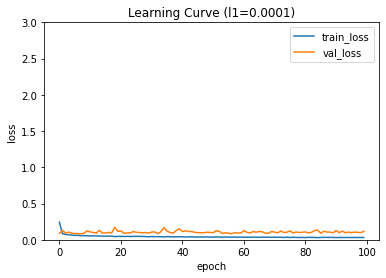

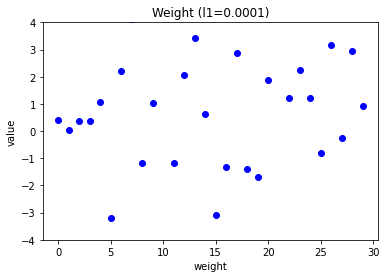

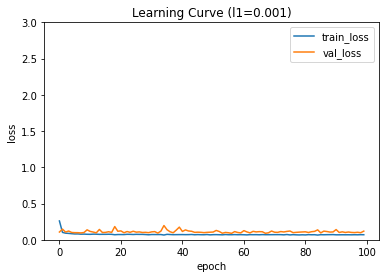

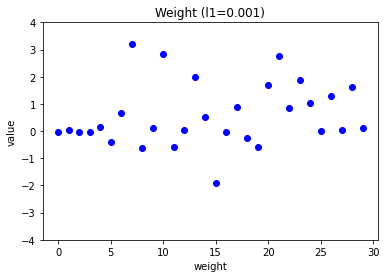

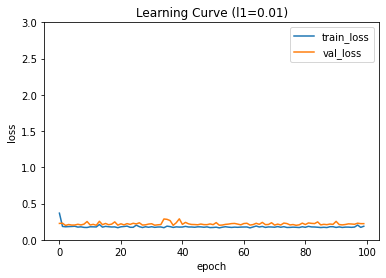

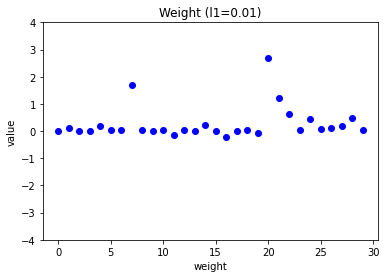

In [9]:
import matplotlib.pyplot as plt

l1_list=[0.0001, 0.001, 0.01]
for l1 in l1_list:
  lyr=SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.xlabel('weight')
  plt.ylabel('value')
  plt.ylim(-4,4)
  plt.show()


In [0]:
layer5=SingleLayer(l1=0.001)
layer5.fit(x_train_scaled,y_train, epochs=20)
layer5.score(x_val_scaled,y_val)

0.9340659340659341

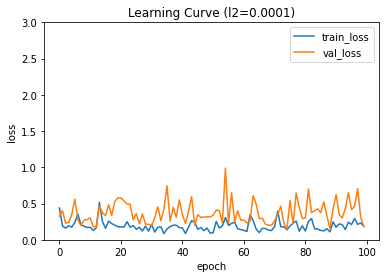

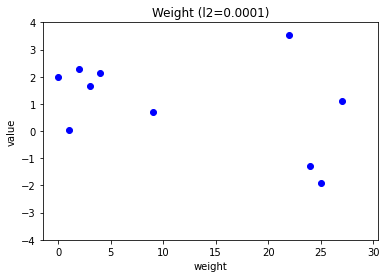

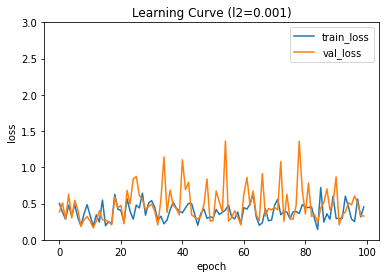

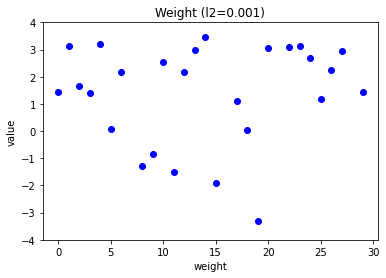

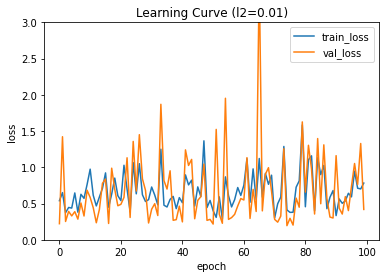

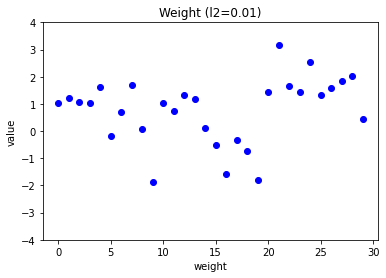

In [0]:
l2_list=[0.0001, 0.001, 0.01]
for l2 in l2_list:
  lyr=SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l2))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.xlabel('weight')
  plt.ylabel('value')
  plt.ylim(-4,4)
  plt.show()


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss='log', penalty='l2', max_iter=1000, tol=1e-3))
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)

0.9560439560439561

In [0]:
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42, max_iter=1000, tol=1e-3)
pipe=make_pipeline(StandardScaler(),sgd)
scores=cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

0.9692270531400966
0.9897447671298227
